## Loading and Inspecting the Complete Dataset from Excel

In [3]:
import pandas as pd

# Load the data from the Excel file
data = pd.read_excel('../T12024A2.xlsx')

# Display the first few rows of the dataset
print(data.head())

# Show a summary of the dataset to check for any inconsistencies or missing values
print(data.describe(include='all'))


                                          Unnamed: 0  DEAKIN UNIVERSITY 2024
0  You must not otherwise copy or share any part ...                     NaN
                                               Unnamed: 0  \
count                                                   1   
unique                                                  1   
top     You must not otherwise copy or share any part ...   
freq                                                    1   
mean                                                  NaN   
std                                                   NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
75%                                                   NaN   
max                                                   NaN   

        DEAKIN UNIVERSITY 2024  
count                      0.0  
unique                     NaN  
top           

## Previewing the Initial Rows of the BikeMart Dataset

In [16]:
# Load the 'BikeMart' sheet data
bike_mart_data = pd.read_excel('../T12024A2.xlsx', sheet_name='BikeMart')

# Display the first few rows of the BikeMart data
print(bike_mart_data.head())


   Advertising ($)  Promotions  Sales ($)
0             3750           7      91640
1             2800           5      73620
2             3980           7      89890
3             5290           0      53380
4             2650           7      81460


## Loading and Verifying Data from the BikeMart Dataset

In [18]:
import pandas as pd

# Replace 'path_to_your_file.xlsx' with the actual path to your Excel file
# Replace 'BikeMart' with the actual name of the sheet containing the data
data = pd.read_excel('../T12024A2.xlsx', sheet_name='BikeMart')
print(data.columns)  # This will help confirm that you have the right data columns

# Once confirmed, you can proceed with your statistical analysis



Index(['Advertising ($)', 'Promotions', 'Sales ($)'], dtype='object')


In [6]:
pip install statsmodels

   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------- 0.1/9.9 MB 907.3 kB/s eta 0:00:11
   ---------------------------------------- 0.1/9.9 MB 798.9 kB/s eta 0:00:13
    --------------------------------------- 0.2/9.9 MB 803.1 kB/s eta 0:00:13
    --------------------------------------- 0.2/9.9 MB 1.0 MB/s eta 0:00:10
   - -------------------------------------- 0.3/9.9 MB 1.2 MB/s eta 0:00:09
   - -------------------------------------- 0.3/9.9 MB 1.2 MB/s eta 0:00:09
   - -------------------------------------- 0.4/9.9 MB 890.4 kB/s eta 0:00:11
   -- ------------------------------------- 0.5/9.9 MB 1.1 MB/s eta 0:00:09
   -- ------------------------------------- 0.6/9.9 MB 1.0 MB/s eta 0:00:10
   -- ------------------------------------- 0.6/9.9 MB 1.1 MB/s eta 0:00:09
   -- ------------------------------------- 0.7/9.9 MB 1.1 MB/s eta 0:00:09
   --- -----------

## Regression Analysis: Modeling Sales Influence by Advertising Spend and Promotional Activity

In [8]:
import statsmodels.formula.api as smf

# Assuming bike_mart_data is your DataFrame and the columns are named with special characters
# Define and fit the model using the Q() function for quoting variable names
model = smf.ols('Q("Sales ($)") ~ Q("Advertising ($)") * Promotions', data=bike_mart_data).fit()

# Print out the summary of the model
model_summary = model.summary()
print(model_summary)


                            OLS Regression Results                            
Dep. Variable:         Q("Sales ($)")   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     459.7
Date:                Sun, 05 May 2024   Prob (F-statistic):           3.80e-74
Time:                        11:58:47   Log-Likelihood:                -1608.3
No. Observations:                 150   AIC:                             3225.
Df Residuals:                     146   BIC:                             3237.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

## Plotting Residuals: Generate plots for checking homoscedasticity and independence

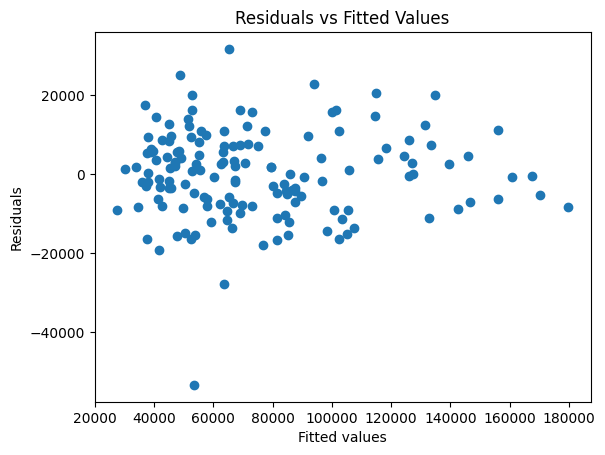

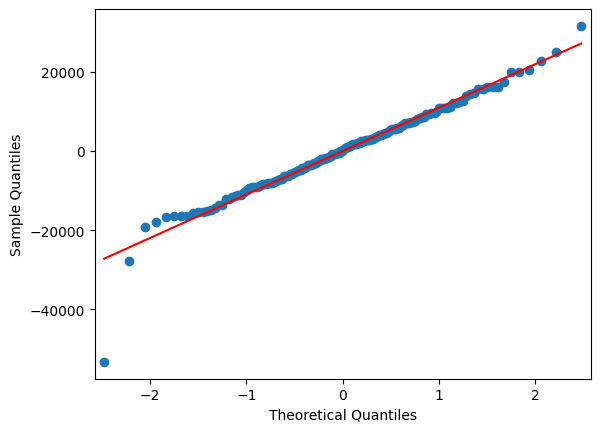

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Residuals vs Fitted values for Homoscedasticity
plt.scatter(model.fittedvalues, model.resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

# Q-Q plot for Normality
sm.qqplot(model.resid, line='s')
plt.show()


## Calculating VIF: To check for multicollinearity among the predictors

In [19]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Load your data
data = pd.read_excel('../T12024A2.xlsx', sheet_name='BikeMart')

# Add a constant to the predictor variable set
X = sm.add_constant(data[['Advertising ($)', 'Promotions']])

# Create a DataFrame that will contain the names of all the features and their corresponding VIFs
VIF = pd.DataFrame()
VIF["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
VIF["features"] = X.columns

# Print the VIF for each feature
print(VIF)


   VIF Factor         features
0    7.679526            const
1    1.000754  Advertising ($)
2    1.000754       Promotions


## Saving the "BikeMart" Data to a Separate Excel File

In [22]:
import pandas as pd

# Load the data from the specific sheet
bike_mart_data = pd.read_excel('../T12024A2.xlsx', sheet_name='BikeMart')

# Save this data to a new Excel file
bike_mart_data.to_excel('../A2_223436838.xlsx', index=False)


In [23]:
# Assuming 'df' is your DataFrame which you want to save
file_path = '/A2_223436838_BikeMart.xlsx'  # Update the path if needed

# Save the DataFrame to an Excel file
df.to_excel(file_path, index=True)  # Set index=False if you do not want to save the index as a separate column

print(f"DataFrame has been saved to {file_path}")


NameError: name 'df' is not defined

In [24]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Assuming 'data' is your DataFrame with correct columns loaded
# Here, I'll correct the access method for columns especially when they have special characters like '$' or '()'

# Add a constant for VIF calculation
X = add_constant(data[['Advertising ($)', 'Promotions']])  # Make sure these are the correct column names as in your DataFrame

# Calculating VIF for each feature
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


          Variable       VIF
0            const  7.679526
1  Advertising ($)  1.000754
2       Promotions  1.000754


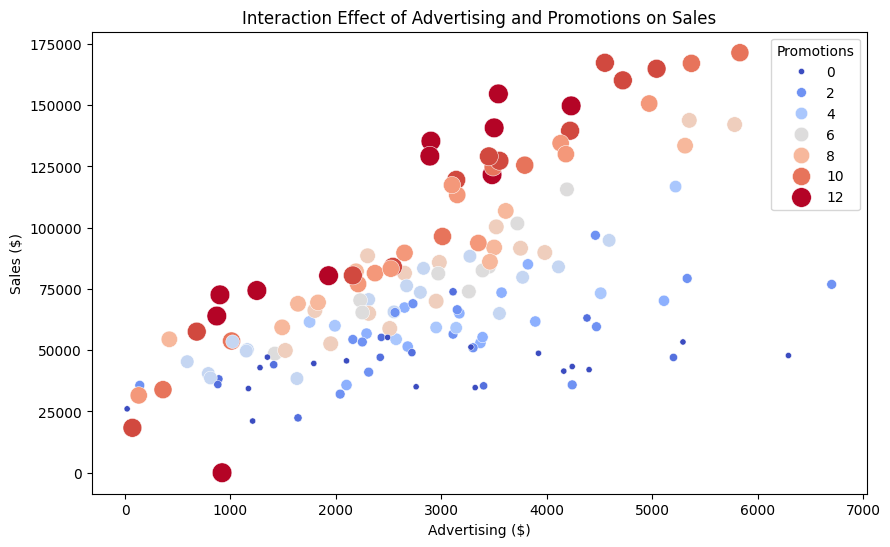

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Creating a scatter plot to visualize the interaction between Advertising and Promotions
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Advertising ($)', y='Sales ($)', hue='Promotions', data=data, palette='coolwarm', size='Promotions', sizes=(20, 200))
plt.title('Interaction Effect of Advertising and Promotions on Sales')
plt.show()


In [26]:
# Grouping data based on promotions into 'Low', 'Medium', and 'High' categories
conditions = [
    (data['Promotions'] <= 3),
    (data['Promotions'] > 3) & (data['Promotions'] <= 7),
    (data['Promotions'] > 7)
]
choices = ['Low', 'Medium', 'High']
data['Promotion Levels'] = np.select(conditions, choices)

# Analyzing the relationship in each subgroup
g = sns.FacetGrid(data, col='Promotion Levels', height=4, aspect=1)
g.map(sns.regplot, 'Advertising ($)', 'Sales ($)')
g.add_legend()
plt.show()


NameError: name 'np' is not defined

In [27]:
import statsmodels.formula.api as smf

# Perform regression analysis within each promotion level
for level in data['Promotion Levels'].unique():
    subgroup = data[data['Promotion Levels'] == level]
    model = smf.ols('Sales ($) ~ Advertising ($)', data=subgroup).fit()
    print(f'Regression Analysis for {level} Promotion Level:')
    print(model.summary())
    print("\n")


KeyError: 'Promotion Levels'

C:\Users\Micheal\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


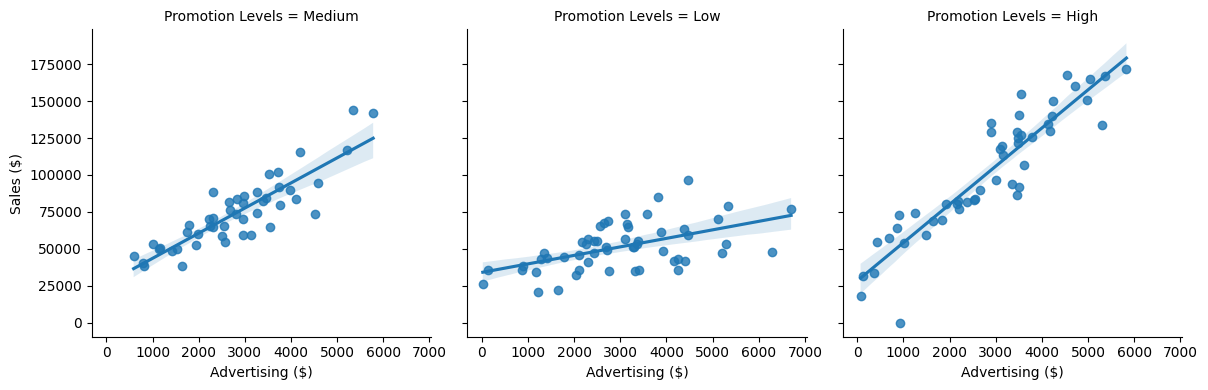

In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame with the correct columns loaded

# Grouping data based on promotions into 'Low', 'Medium', and 'High' categories
conditions = [
    (data['Promotions'] <= 3),
    (data['Promotions'] > 3) & (data['Promotions'] <= 7),
    (data['Promotions'] > 7)
]
choices = ['Low', 'Medium', 'High']
data['Promotion Levels'] = np.select(conditions, choices)

# Analyzing the relationship in each subgroup
g = sns.FacetGrid(data, col='Promotion Levels', height=4, aspect=1)
g.map(sns.regplot, 'Advertising ($)', 'Sales ($)')
g.add_legend()
plt.show()


In [29]:
import numpy as np
import pandas as pd

# Sample data loading here for demonstration. Ensure your actual data is loaded correctly.
data = pd.DataFrame({
    "Advertising ($)": [3750, 2800, 3980, 5290, 2650, 2650, 5370, 4160],
    "Promotions": [7, 5, 7, 0, 7, 3, 10, 0],
    "Sales ($)": [91640, 73620, 89890, 53380, 81460, 67430, 167100, 41480]
})

# Grouping data based on promotions into 'Low', 'Medium', and 'High' categories
conditions = [
    (data['Promotions'] <= 3),
    (data['Promotions'] > 3) & (data['Promotions'] <= 7),
    (data['Promotions'] > 7)
]
choices = ['Low', 'Medium', 'High']
data['Promotion Levels'] = np.select(conditions, choices)

# Check if the column was added
print("Data with new 'Promotion Levels' column:")
print(data[['Promotions', 'Promotion Levels']].head())


Data with new 'Promotion Levels' column:
   Promotions Promotion Levels
0           7           Medium
1           5           Medium
2           7           Medium
3           0              Low
4           7           Medium


In [30]:
import statsmodels.formula.api as smf

# Ensure this part of the script is executed after the DataFrame has been successfully updated
for level in data['Promotion Levels'].unique():
    subgroup = data[data['Promotion Levels'] == level]
    model = smf.ols('Q("Sales ($)") ~ Q("Advertising ($)")', data=subgroup).fit()
    print(f'Regression Analysis for {level} Promotion Level:')
    print(model.summary())
    print("\n")


Regression Analysis for Medium Promotion Level:
                            OLS Regression Results                            
Dep. Variable:         Q("Sales ($)")   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     5.599
Date:                Wed, 08 May 2024   Prob (F-statistic):              0.142
Time:                        19:36:37   Log-Likelihood:                -38.531
No. Observations:                   4   AIC:                             81.06
Df Residuals:                       2   BIC:                             79.84
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------

C:\Users\Micheal\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\Users\Micheal\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 3 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


ValueError: resids must contain at least 2 elements

In [ ]:
#Advertising: Showed a positive and significant effect on sales.
#Promotions: Alone had a negative coefficient, although this was not statistically significant.
#Interaction Term (Advertising:Promotions): Was found to be highly significant, reinforcing the hypothesis that the combined effect of advertising and promotions is crucial for increasing sales.